In [134]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

# Hypothesis testing: Chi-Square Test within the Eniac case study



## 1.&nbsp;State the Null Hypothesis and the Alternative Hypothesis.

($H_0$): all versions have the same CTR.

($H_A$): there is a difference in the CTR for the different versions.

## 2.&nbsp; Select an appropriate significance level alpha ($\alpha$).

It was decided that a relatively high alpha was acceptable in this case

In [136]:
alpha = 0.05

## 3.&nbsp; Collect data that is random and independent

The important pieces of information (clicks on each element of interest & visits on each page) are scattered around. Let's collect them. Where are the .csv files? 🥸

In [167]:
url = 'https://raw.githubusercontent.com/Jan0341/Eniac3-AB-Test/refs/heads/main/eniac_a.csv'
eniac_a = pd.read_csv('https://raw.githubusercontent.com/Jan0341/Eniac3-AB-Test/refs/heads/main/eniac_a.csv')

In [168]:
url ='https://raw.githubusercontent.com/Jan0341/Eniac3-AB-Test/refs/heads/main/eniac_b.csv'
eniac_b = pd.read_csv('https://raw.githubusercontent.com/Jan0341/Eniac3-AB-Test/refs/heads/main/eniac_b.csv')

In [169]:
url ='https://raw.githubusercontent.com/Jan0341/Eniac3-AB-Test/refs/heads/main/eniac_c.csv'
eniac_c = pd.read_csv('https://raw.githubusercontent.com/Jan0341/Eniac3-AB-Test/refs/heads/main/eniac_c.csv')

In [170]:
url = 'https://raw.githubusercontent.com/Jan0341/Eniac3-AB-Test/refs/heads/main/eniac_d.csv'
eniac_d = pd.read_csv('https://raw.githubusercontent.com/Jan0341/Eniac3-AB-Test/refs/heads/main/eniac_d.csv')

In [171]:
eniac_a.sample(10)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
48,53,a,Help,43,True,NaN
46,64,a,Gift card,41,True,NaN
14,59,a,Contact,266,True,NaN
29,111,img,leopard-case,874,True,NaN
11,52,a,Watch,212,True,NaN
53,114,a,Snapchat,289,True,NaN
51,8,a,Facebook,278,True,NaN
36,120,input,Email,208,True,NaN
1,25,div,mySidebar,309,True,created 2021-09-14 • 14 days 0 hours 34 mi...
35,82,input,Name,214,True,NaN


## 4.&nbsp; Calculate the test result

In [143]:
total_clicks_a = eniac_a.loc[eniac_a["Name"]=="SHOP NOW", "No. clicks"].iloc[0]
total_clicks_b = eniac_b.loc[eniac_b["Name"]=="SHOP NOW", "No. clicks"].iloc[0]
total_clicks_c = eniac_c.loc[eniac_c["Name"]=="SEE DEALS", "No. clicks"].iloc[0]
total_clicks_d = eniac_d.loc[eniac_d["Name"]=="SEE DEALS", "No. clicks"].iloc[0]

In [151]:
total_clicks_a

np.int64(512)

In [146]:
eniac_a.iloc[1, -1]

'created 2021-09-14   •   14 days 0 hours 34 mins   •   25326 visits, 23174 clicks'

In [147]:
eniac_b.iloc[1, -1]

'created 2021-10-27   •   14 days 0 hours 34 mins   •   24747 visits, 22407 clicks'

In [148]:
eniac_c.iloc[1, -1]

'created 2021-10-27   •   14 days 0 hours 34 mins   •   24876 visits, 23031 clicks'

In [149]:
eniac_d.iloc[1, -1]

'created 2021-10-27   •   14 days 0 hours 34 mins   •   25233 visits, 22743 clicks'

In [152]:
#Eniac_A: created 2021-09-14   •   14 days 0 hours 34 mins   •   25326 visits, 23174 clicks
eniac_a_visits = 25326
#Eniac_B: created 2021-10-27   •   14 days 0 hours 34 mins   •   24747 visits, 22407 clicks
eniac_b_visits = 24747
#Eniac_C: created 2021-10-27   •   14 days 0 hours 34 mins   •   24876 visits, 23031 clicks
eniac_c_visits = 24876
#Eniac_D: created 2021-10-27   •   14 days 0 hours 34 mins   •   25233 visits, 22743 clicks
eniac_d_visits = 25233

## Time Period of Df eniac_a is different to b,c,d => Problem? Numbers of visitors, Special Days, etc.

In [154]:
# Visits (Potential/Possible Clicks on our Button) - total_clicks_a (All clicks on our Test-Buttton"SHOP NOW" or "SEE DEALS") = Total Number of Clicks NOT on our Button
eniac_a_no_cl = eniac_a_visits - total_clicks_a
eniac_b_no_cl = eniac_b_visits - total_clicks_b
eniac_c_no_cl = eniac_c_visits - total_clicks_c
eniac_d_no_cl = eniac_d_visits - total_clicks_d

In [155]:
# Creating two tables with to compare Clicks and No-Clicks
clicks = [total_clicks_a, total_clicks_b, total_clicks_c, total_clicks_d]
noclicks = [eniac_a_no_cl, eniac_b_no_cl, eniac_c_no_cl, eniac_d_no_cl]

In [159]:
# Creating one table with the Click&NoClick Table
observed_results = pd.DataFrame(data = [clicks, noclicks],
                                columns = ["Version_A", "Version_B", "Version_C", "Version_D"],
                                index = ["Click", "No-click"])

observed_results

,Version_A,Version_B,Version_C,Version_D
Click,512,281,527,193
No-click,24814,24466,24349,25040


In [160]:
# Chi-Square Test
chisq, pvalue, df, expected = stats.chi2_contingency(observed_results)

In [163]:
# p-value
print("p-value:", pvalue)

p-Wert: 2.7161216607868712e-48


In [166]:
if pvalue > alpha:
  print("Do not reject the null hypothesis")
else:
  print("Reject the null hypothesis")

Reject the null hypothesis


## 5.&nbsp; Interpret the test result

No Clear Result => Post Hoc Test:

Version A - Version B
Version A - Version C
Version A - Version D
Version B - Version C
Version B - Version D
Version C - Version D

To prevent the alpha (0.05) from summing up, we have to divide the alpha equally for every comparison.

In [172]:
possible_combinations = 6
alpha_post_hoc = alpha / possible_combinations
alpha_post_hoc

0.008333333333333333

## 6.&nbsp; Calculating CTR(Click-through-rate)



In [173]:
# CTR
eniac_a_ctr = total_clicks_a / eniac_a_visits
eniac_b_ctr = total_clicks_b / eniac_b_visits
eniac_c_ctr = total_clicks_c / eniac_c_visits
eniac_d_ctr = total_clicks_d / eniac_d_visits

In [174]:
# display as DataFrame
rates = [eniac_a_ctr, eniac_b_ctr, eniac_c_ctr, eniac_d_ctr]
names = ["Version_A", "Version_B", "Version_C", "Version_D"]

In [176]:
ctr_df = pd.DataFrame({"names": names, "rates": rates})
ctr_df.sort_values("rates", ascending=False)

,names,rates
2,Version_C,0.021185
0,Version_A,0.020216
1,Version_B,0.011355
3,Version_D,0.007649


The White-Buttons have a higher CTR than the Red Buttons.

In [181]:
# empty dictionary to fill with our results
stat_significant_dict = {
                        "Version_A": [],
                        "Version_B": [],
                        "Version_C": [],
                        "Version_D": []
                         }
# compare each version to each other version
for i in observed_results.columns:
  for j in observed_results.columns:
    # use scipy to find the p-value of each pair
    chisq, pvalue, df, expected = stats.chi2_contingency(observed_results.loc[:, [i, j]], correction=False)
    # boolean: if the p-value is lower than alpha, our result is statistically significant
    stat_significant_dict[i].append(pvalue < alpha_post_hoc)

# create a DataFrame of results
stat_significant_df = pd.DataFrame(stat_significant_dict,
                                   index=observed_results.columns)

stat_significant_df

,Version_A,Version_B,Version_C,Version_D
Version_A,False,True,False,True
Version_B,True,False,True,True
Version_C,False,True,False,True
Version_D,True,True,True,False


## 7.&nbsp; How do we decide who's the winner?
Using a heatmap for better understanding maybe will help:

Text(0.5, 1.0, 'Statistical Significance in Pairwise Tests: True or False?')

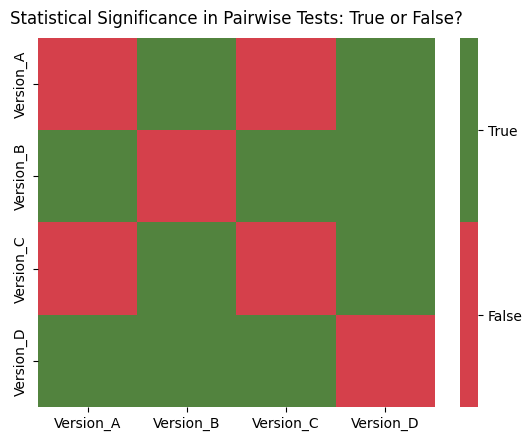

In [180]:
# create a heatmap from the DataFrame & red/green colour palette
red_green_palette = sns.diverging_palette(10, 120, n=2, s=70, l=50)
ax = sns.heatmap(stat_significant_df, cmap=red_green_palette)

# Manually specify colorbar labelling after it's been generated
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['False', 'True'])

# Add a title to the heatmap
ax.set_title("Statistical Significance in Pairwise Tests: True or False?", pad=10)

No clear winner, Version C performs in comparison to B and D with a higher CTR but not to Version A.
Version A&C are winners, need to run more tests or modify the data.